In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
from sklearn.decomposition import NMF
import seaborn as sns
import gseapy as gp
import numpy as np
from scipy.cluster.hierarchy import linkage, cophenet
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist

In [16]:
SAMPLES = {
    "skin_TXK6Z4X_A1": {
        "id": "skin_TXK6Z4X_A1",
        "name": "skin_TXK6Z4X_A1",
        "adata": "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5",
        "wsi": "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif",
        "tiles": "../Data/skin_TXK6Z4X_A1_processed/skin_TXK6Z4X_A1_processed_tiles",
        "cells_layer": "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png",
    },
    "skin_TXK6Z4X_D1": {
        "id": "skin_TXK6Z4X_D1",
        "name": "skin_TXK6Z4X_D1",
        "adata": "../Data/skin_TXK6Z4X_D1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5",
        "wsi": "../Data/skin_TXK6Z4X_D1_processed/tmap/wsi.tif",
        "tiles": "../Data/skin_TXK6Z4X_D1_processed/skin_TXK6Z4X_D1_processed_tiles",
        "cells_layer": "../Data/skin_TXK6Z4X_D1_processed/cells_layer.png",
    },
}

# Anndata object path
cells_adata_path_A1 = (
    "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

cells_adata_path_D1 = (
    "../Data/skin_TXK6Z4X_D1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

# Cropped whole slide image
wsi_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif"

# Cell boundaries image
cells_layer_path = "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png"

In [17]:
adata_A1 = sc.read_h5ad(cells_adata_path_A1)
adata_D1 = sc.read_h5ad(cells_adata_path_D1)

In [4]:
cell_list1 = [
    "ID_61822",
    "ID_61849",
    "ID_61875",
    "ID_61909",
    "ID_61964",
    "ID_62001",
    "ID_62019",
    "ID_62021",
    "ID_62024",
    "ID_62056",
    "ID_62057",
    "ID_62062",
    "ID_62114",
    "ID_62161",
    "ID_62198",
    "ID_62211",
    "ID_62231",
    "ID_62251",
    "ID_62260",
    "ID_62277",
    "ID_62303",
    "ID_62355",
    "ID_62468",
    "ID_62512",
    "ID_62523",
    "ID_62533",
    "ID_62545",
    "ID_62621",
    "ID_62725",
    "ID_62745",
    "ID_62805",
    "ID_62845",
    "ID_62847",
    "ID_62849",
    "ID_62853",
    "ID_62888",
    "ID_62891",
    "ID_62904",
    "ID_62926",
    "ID_62930",
    "ID_62972",
    "ID_63002",
    "ID_63019",
    "ID_63023",
    "ID_63035",
    "ID_63044",
    "ID_63074",
    "ID_63099",
    "ID_63125",
    "ID_63132",
    "ID_63144",
    "ID_63202",
    "ID_63206",
    "ID_63230",
    "ID_63283",
    "ID_63287",
    "ID_63316",
    "ID_63319",
    "ID_63335",
    "ID_63371",
    "ID_63478",
    "ID_63539",
    "ID_63546",
    "ID_63571",
    "ID_63627",
    "ID_63650",
    "ID_63717",
    "ID_63745",
    "ID_63766",
    "ID_63775",
    "ID_63802",
    "ID_63843",
    "ID_63867",
    "ID_63913",
    "ID_63922",
    "ID_63940",
    "ID_63996",
    "ID_64114",
    "ID_64147",
    "ID_64186",
    "ID_64272",
    "ID_64285",
    "ID_64374",
    "ID_64401",
    "ID_64477",
    "ID_64507",
    "ID_64540",
    "ID_64769",
    "ID_64893",
    "ID_64910",
    "ID_64994",
    "ID_65226",
    "ID_65331",
    "ID_65581",
    "ID_65601",
    "ID_65607",
    "ID_65705",
    "ID_65730",
    "ID_65737",
    "ID_65838",
    "ID_65864",
    "ID_66014",
    "ID_66198",
    "ID_66302",
    "ID_66368",
    "ID_66556",
    "ID_66684",
    "ID_66705",
    "ID_66744",
    "ID_66765",
    "ID_66774",
    "ID_66879",
    "ID_66889",
    "ID_67148",
    "ID_67303",
    "ID_67554",
    "ID_67605",
    "ID_67772",
    "ID_67787",
    "ID_67830",
    "ID_67832",
    "ID_67929",
    "ID_67969",
    "ID_68043",
    "ID_68205",
    "ID_68224",
    "ID_68475",
    "ID_68505",
    "ID_68530",
    "ID_68595",
    "ID_68633",
    "ID_68651",
    "ID_68759",
    "ID_68819",
    "ID_68895",
    "ID_68897",
    "ID_68992",
    "ID_69055",
    "ID_69119",
    "ID_69176",
    "ID_69181",
    "ID_69183",
    "ID_69213",
    "ID_69224",
    "ID_69229",
    "ID_69444",
    "ID_69602",
    "ID_69862",
    "ID_69971",
    "ID_70130",
    "ID_70165",
    "ID_70323",
    "ID_70381",
    "ID_70399",
    "ID_70501",
    "ID_70537",
    "ID_70539",
    "ID_70543",
    "ID_70547",
    "ID_70554",
    "ID_70556",
    "ID_70573",
    "ID_70574",
    "ID_70597",
    "ID_70600",
    "ID_70602",
    "ID_70606",
    "ID_70612",
    "ID_70613",
    "ID_70615",
    "ID_70622",
    "ID_70633",
    "ID_70638",
    "ID_70639",
    "ID_70644",
    "ID_70645",
    "ID_70646",
    "ID_70650",
    "ID_70656",
    "ID_70662",
    "ID_70663",
    "ID_70665",
    "ID_70669",
    "ID_70672",
    "ID_70676",
    "ID_70677",
    "ID_70681",
    "ID_70689",
    "ID_70692",
    "ID_70699",
    "ID_70700",
    "ID_70704",
    "ID_70712",
    "ID_70720",
    "ID_70728",
    "ID_70735",
    "ID_70740",
    "ID_70741",
    "ID_70759",
    "ID_70761",
    "ID_70765",
    "ID_70767",
    "ID_70773",
    "ID_70784",
    "ID_70790",
    "ID_70795",
    "ID_70797",
    "ID_70799",
    "ID_70811",
    "ID_70822",
    "ID_70826",
    "ID_70832",
    "ID_70837",
    "ID_70841",
    "ID_70847",
    "ID_70854",
    "ID_70857",
    "ID_70865",
    "ID_70878",
    "ID_70880",
    "ID_70890",
    "ID_70892",
    "ID_70895",
    "ID_70900",
    "ID_70904",
    "ID_70907",
    "ID_70931",
    "ID_70934",
    "ID_70938",
    "ID_70939",
    "ID_70953",
    "ID_70962",
    "ID_70965",
    "ID_70982",
    "ID_70984",
    "ID_70988",
    "ID_70992",
    "ID_70996",
    "ID_71004",
    "ID_71019",
    "ID_71031",
    "ID_71033",
    "ID_71035",
    "ID_71040",
    "ID_71044",
    "ID_71047",
    "ID_71048",
    "ID_71062",
    "ID_71064",
    "ID_71068",
    "ID_71080",
    "ID_71088",
    "ID_71098",
    "ID_71101",
    "ID_71102",
    "ID_71104",
    "ID_71107",
    "ID_71117",
    "ID_71120",
    "ID_71123",
    "ID_71125",
    "ID_71128",
    "ID_71133",
    "ID_71138",
    "ID_71139",
    "ID_71142",
    "ID_71152",
    "ID_71158",
    "ID_71163",
    "ID_71174",
    "ID_71180",
    "ID_71186",
    "ID_71194",
    "ID_71198",
    "ID_71200",
    "ID_71202",
    "ID_71206",
    "ID_71209",
    "ID_71225",
    "ID_71250",
    "ID_71265",
    "ID_71271",
    "ID_71275",
    "ID_71280",
    "ID_71286",
    "ID_71302",
    "ID_71311",
    "ID_71318",
    "ID_71330",
    "ID_71331",
    "ID_71332",
    "ID_71346",
    "ID_71353",
    "ID_71364",
    "ID_71366",
    "ID_71376",
    "ID_71381",
    "ID_71383",
    "ID_71385",
    "ID_71387",
    "ID_71388",
    "ID_71391",
    "ID_71395",
    "ID_71407",
    "ID_71412",
    "ID_71420",
    "ID_71428",
    "ID_71431",
    "ID_71434",
    "ID_71439",
    "ID_71458",
    "ID_71460",
    "ID_71486",
    "ID_71491",
    "ID_71495",
    "ID_71496",
    "ID_71516",
    "ID_71518",
    "ID_71522",
    "ID_71523",
    "ID_71525",
    "ID_71533",
    "ID_71542",
    "ID_71550",
    "ID_71554",
    "ID_71556",
    "ID_71560",
    "ID_71561",
    "ID_71562",
    "ID_71574",
    "ID_71582",
    "ID_71593",
    "ID_71596",
    "ID_71598",
    "ID_71602",
    "ID_71605",
    "ID_71610",
    "ID_71615",
    "ID_71621",
    "ID_71622",
    "ID_71639",
    "ID_71644",
    "ID_71656",
    "ID_71668",
    "ID_71673",
    "ID_71676",
    "ID_71679",
    "ID_71680",
    "ID_71701",
    "ID_71702",
    "ID_71704",
    "ID_71707",
    "ID_71713",
    "ID_71724",
    "ID_71737",
    "ID_71742",
    "ID_71756",
    "ID_71768",
    "ID_71769",
    "ID_71774",
    "ID_71786",
    "ID_71795",
    "ID_71824",
    "ID_71835",
    "ID_71846",
    "ID_71847",
    "ID_71853",
    "ID_71855",
    "ID_71862",
    "ID_71867",
    "ID_71884",
    "ID_71886",
    "ID_71925",
    "ID_71928",
    "ID_71930",
    "ID_71941",
    "ID_71970",
    "ID_71978",
    "ID_71983",
    "ID_71984",
    "ID_71991",
    "ID_72004",
    "ID_72007",
    "ID_72013",
    "ID_72022",
    "ID_72029",
    "ID_72036",
    "ID_72040",
    "ID_72042",
    "ID_72050",
    "ID_72061",
    "ID_72067",
    "ID_72071",
    "ID_72074",
    "ID_72079",
    "ID_72083",
    "ID_72087",
    "ID_72095",
    "ID_72105",
    "ID_72112",
    "ID_72114",
    "ID_72129",
    "ID_72136",
    "ID_72140",
    "ID_72142",
    "ID_72155",
    "ID_72156",
    "ID_72158",
    "ID_72161",
    "ID_72169",
    "ID_72177",
    "ID_72184",
    "ID_72209",
    "ID_72221",
    "ID_72228",
    "ID_72229",
    "ID_72231",
    "ID_72234",
    "ID_72237",
    "ID_72249",
    "ID_72256",
    "ID_72257",
    "ID_72265",
    "ID_72272",
    "ID_72314",
    "ID_72333",
    "ID_72340",
    "ID_72349",
    "ID_72357",
    "ID_72363",
    "ID_72367",
    "ID_72381",
    "ID_72391",
    "ID_72425",
    "ID_72427",
    "ID_72432",
    "ID_72438",
    "ID_72455",
    "ID_72460",
    "ID_72466",
    "ID_72467",
    "ID_72470",
    "ID_72476",
    "ID_72497",
    "ID_72501",
    "ID_72509",
    "ID_72511",
    "ID_72517",
    "ID_72519",
    "ID_72539",
    "ID_72540",
    "ID_72542",
    "ID_72551",
    "ID_72555",
    "ID_72569",
    "ID_72579",
    "ID_72583",
    "ID_72591",
    "ID_72592",
    "ID_72606",
    "ID_72621",
    "ID_72622",
    "ID_72631",
    "ID_72649",
    "ID_72656",
    "ID_72660",
    "ID_72671",
    "ID_72691",
    "ID_72701",
    "ID_72715",
    "ID_72718",
    "ID_72727",
    "ID_72735",
    "ID_72748",
    "ID_72757",
    "ID_72762",
    "ID_72763",
    "ID_72792",
    "ID_72802",
    "ID_72803",
    "ID_72805",
    "ID_72810",
    "ID_72857",
    "ID_72884",
    "ID_72888",
    "ID_72908",
    "ID_72909",
    "ID_72910",
    "ID_72922",
    "ID_72923",
    "ID_72937",
    "ID_72938",
    "ID_72955",
    "ID_72971",
    "ID_72977",
    "ID_72994",
    "ID_73014",
    "ID_73022",
    "ID_73024",
    "ID_73025",
    "ID_73030",
    "ID_73053",
    "ID_73054",
    "ID_73055",
    "ID_73058",
    "ID_73061",
    "ID_73070",
    "ID_73081",
    "ID_73104",
    "ID_73109",
    "ID_73111",
    "ID_73120",
    "ID_73155",
    "ID_73186",
    "ID_73189",
    "ID_73211",
    "ID_73221",
    "ID_73226",
    "ID_73238",
    "ID_73240",
    "ID_73248",
    "ID_73250",
    "ID_73251",
    "ID_73276",
    "ID_73278",
    "ID_73279",
    "ID_73285",
    "ID_73287",
    "ID_73317",
    "ID_73318",
    "ID_73325",
    "ID_73333",
    "ID_73334",
    "ID_73368",
    "ID_73390",
    "ID_73413",
    "ID_73414",
    "ID_73417",
    "ID_73429",
    "ID_73442",
    "ID_73459",
    "ID_73489",
    "ID_73490",
    "ID_73506",
    "ID_73511",
    "ID_73512",
    "ID_73515",
    "ID_73521",
    "ID_73525",
    "ID_73537",
    "ID_73538",
    "ID_73543",
    "ID_73573",
    "ID_73574",
    "ID_73618",
    "ID_73619",
    "ID_73626",
    "ID_73634",
    "ID_73640",
    "ID_73647",
    "ID_73659",
    "ID_73678",
    "ID_73693",
    "ID_73764",
    "ID_73768",
    "ID_73771",
    "ID_73772",
    "ID_73796",
    "ID_73798",
    "ID_73820",
    "ID_73829",
    "ID_73872",
    "ID_73878",
    "ID_73884",
    "ID_73925",
    "ID_73939",
    "ID_73979",
    "ID_73986",
    "ID_73994",
    "ID_74008",
    "ID_74010",
    "ID_74037",
    "ID_74043",
    "ID_74049",
    "ID_74055",
    "ID_74103",
    "ID_74122",
    "ID_74130",
    "ID_74142",
    "ID_74143",
    "ID_74175",
    "ID_74187",
    "ID_74240",
    "ID_74248",
    "ID_74268",
    "ID_74276",
    "ID_74285",
    "ID_74301",
    "ID_74371",
    "ID_74383",
    "ID_74411",
    "ID_74425",
    "ID_74458",
    "ID_74465",
    "ID_74480",
    "ID_74483",
    "ID_74502",
    "ID_74513",
    "ID_74525",
    "ID_74556",
    "ID_74575",
    "ID_74584",
    "ID_74608",
    "ID_74613",
    "ID_74621",
    "ID_74636",
    "ID_74671",
    "ID_74683",
    "ID_74687",
    "ID_74701",
    "ID_74712",
    "ID_74719",
    "ID_74720",
    "ID_74721",
    "ID_74724",
    "ID_74728",
    "ID_74806",
    "ID_74823",
    "ID_74825",
    "ID_74831",
    "ID_74834",
    "ID_74842",
    "ID_74867",
    "ID_74892",
    "ID_74903",
    "ID_74922",
    "ID_74923",
    "ID_74940",
    "ID_74979",
    "ID_74998",
    "ID_75013",
    "ID_75019",
    "ID_75046",
    "ID_75054",
    "ID_75077",
    "ID_75087",
    "ID_75088",
    "ID_75089",
    "ID_75121",
    "ID_75124",
    "ID_75161",
    "ID_75167",
    "ID_75177",
    "ID_75182",
    "ID_75200",
    "ID_75202",
    "ID_75206",
    "ID_75348",
    "ID_75380",
    "ID_75388",
    "ID_75482",
    "ID_75489",
    "ID_75514",
    "ID_75517",
    "ID_75539",
    "ID_75584",
    "ID_75587",
    "ID_75591",
    "ID_75601",
    "ID_75633",
    "ID_75683",
    "ID_75699",
    "ID_75719",
    "ID_75728",
    "ID_75743",
    "ID_75746",
    "ID_75761",
    "ID_75794",
    "ID_75801",
    "ID_75824",
    "ID_75855",
    "ID_75906",
    "ID_75922",
    "ID_75936",
    "ID_75942",
    "ID_75978",
    "ID_76035",
    "ID_76059",
    "ID_76073",
    "ID_76090",
    "ID_76114",
    "ID_76129",
    "ID_76130",
    "ID_76142",
    "ID_76161",
    "ID_76176",
    "ID_76200",
    "ID_76203",
    "ID_76209",
    "ID_76211",
    "ID_76224",
    "ID_76234",
    "ID_76251",
    "ID_76253",
    "ID_76298",
    "ID_76300",
    "ID_76305",
    "ID_76312",
    "ID_76314",
    "ID_76342",
    "ID_76435",
    "ID_76454",
    "ID_76477",
    "ID_76492",
    "ID_76590",
    "ID_76596",
    "ID_76606",
    "ID_76632",
    "ID_76639",
    "ID_76648",
    "ID_76663",
    "ID_76674",
    "ID_76686",
    "ID_76719",
    "ID_76778",
    "ID_76786",
    "ID_76787",
    "ID_76809",
    "ID_76832",
    "ID_76864",
    "ID_76867",
    "ID_76870",
    "ID_76880",
    "ID_76892",
    "ID_76898",
    "ID_76931",
    "ID_76965",
    "ID_76968",
    "ID_76972",
    "ID_77040",
    "ID_77052",
    "ID_77061",
    "ID_77064",
    "ID_77080",
    "ID_77134",
    "ID_77164",
    "ID_77177",
    "ID_77288",
    "ID_77309",
    "ID_77379",
    "ID_77390",
    "ID_77391",
    "ID_77397",
    "ID_77421",
    "ID_77437",
    "ID_77462",
    "ID_77485",
    "ID_77497",
    "ID_77571",
    "ID_77634",
    "ID_77673",
    "ID_77681",
    "ID_77698",
    "ID_77711",
    "ID_77733",
    "ID_77788",
    "ID_77795",
    "ID_77812",
    "ID_77813",
    "ID_77817",
    "ID_77865",
    "ID_77887",
    "ID_77905",
    "ID_77922",
    "ID_77923",
    "ID_77939",
    "ID_77960",
    "ID_77975",
    "ID_78008",
    "ID_78009",
    "ID_78014",
    "ID_78016",
    "ID_78079",
    "ID_78105",
    "ID_78164",
    "ID_78228",
    "ID_78233",
    "ID_78247",
    "ID_78298",
    "ID_78311",
    "ID_78316",
    "ID_78342",
    "ID_78362",
    "ID_78387",
    "ID_78417",
    "ID_78420",
    "ID_78431",
    "ID_78479",
    "ID_78486",
    "ID_78493",
    "ID_78498",
    "ID_78535",
    "ID_78541",
    "ID_78553",
    "ID_78555",
    "ID_78612",
    "ID_78637",
    "ID_78662",
    "ID_78676",
    "ID_78679",
    "ID_78683",
    "ID_78687",
    "ID_78689",
    "ID_78696",
    "ID_78707",
    "ID_78740",
    "ID_78755",
    "ID_78771",
    "ID_78772",
    "ID_78776",
    "ID_78780",
    "ID_78796",
    "ID_78827",
    "ID_78836",
    "ID_78841",
    "ID_78865",
    "ID_78876",
    "ID_78901",
    "ID_78906",
    "ID_78913",
    "ID_78925",
    "ID_78929",
    "ID_78938",
    "ID_78947",
    "ID_79038",
    "ID_79073",
    "ID_79115",
    "ID_79121",
    "ID_79221",
    "ID_79234",
    "ID_79332",
    "ID_79365",
    "ID_79385",
    "ID_79399",
    "ID_79400",
    "ID_79406",
    "ID_79411",
    "ID_79416",
    "ID_79430",
    "ID_79438",
    "ID_79447",
    "ID_79457",
    "ID_79458",
    "ID_79465",
    "ID_79520",
    "ID_79529",
    "ID_79611",
    "ID_79623",
    "ID_79628",
    "ID_79631",
    "ID_79646",
    "ID_79659",
    "ID_79662",
    "ID_79771",
    "ID_79852",
    "ID_79869",
    "ID_79882",
    "ID_79883",
    "ID_79884",
    "ID_79918",
    "ID_79940",
    "ID_79943",
    "ID_79970",
    "ID_80027",
    "ID_80054",
    "ID_80085",
    "ID_80095",
    "ID_80099",
    "ID_80110",
    "ID_80159",
    "ID_80169",
    "ID_80175",
    "ID_80211",
    "ID_80262",
    "ID_80299",
    "ID_80332",
    "ID_80344",
    "ID_80346",
    "ID_80452",
    "ID_80466",
    "ID_80470",
    "ID_80550",
    "ID_80570",
    "ID_80577",
    "ID_80583",
    "ID_80592",
    "ID_80598",
    "ID_80609",
    "ID_80616",
    "ID_80617",
    "ID_80628",
    "ID_80637",
    "ID_80654",
    "ID_80657",
    "ID_80660",
    "ID_80693",
    "ID_80718",
    "ID_80721",
    "ID_80728",
    "ID_80732",
    "ID_80770",
    "ID_80774",
    "ID_80780",
    "ID_80800",
    "ID_80817",
    "ID_80849",
    "ID_80853",
    "ID_80906",
    "ID_80925",
    "ID_80926",
    "ID_80946",
    "ID_80993",
    "ID_81007",
    "ID_81011",
    "ID_81024",
    "ID_81059",
    "ID_81069",
    "ID_81070",
    "ID_81083"
]

cell_list2 = [
    "ID_100002",
    "ID_100003",
    "ID_100004",
    "ID_100005",
    "ID_100010",
    "ID_100019",
    "ID_100020",
    "ID_100021",
    "ID_100028",
    "ID_100030",
    "ID_100035",
    "ID_100036",
    "ID_100038",
    "ID_100040",
    "ID_100042",
    "ID_100054",
    "ID_100055",
    "ID_100056",
    "ID_100059",
    "ID_100060",
    "ID_100062",
    "ID_100064",
    "ID_100068",
    "ID_100069",
    "ID_100070",
    "ID_100072",
    "ID_100077",
    "ID_100078",
    "ID_100082",
    "ID_100086",
    "ID_100090",
    "ID_100092",
    "ID_100093",
    "ID_100101",
    "ID_100103",
    "ID_100105",
    "ID_100108",
    "ID_100110",
    "ID_100116",
    "ID_100117",
    "ID_100118",
    "ID_100122",
    "ID_100125",
    "ID_100127",
    "ID_100128",
    "ID_100130",
    "ID_100134",
    "ID_100135",
    "ID_100136",
    "ID_100137",
    "ID_100141",
    "ID_100163",
    "ID_100167",
    "ID_100176",
    "ID_100177",
    "ID_100179",
    "ID_100183",
    "ID_100184",
    "ID_100190",
    "ID_100194",
    "ID_100195",
    "ID_100196",
    "ID_100198",
    "ID_100200",
    "ID_100201",
    "ID_100205",
    "ID_100206",
    "ID_100208",
    "ID_100209",
    "ID_100213",
    "ID_100217",
    "ID_100221",
    "ID_100226",
    "ID_100227",
    "ID_100231",
    "ID_100245",
    "ID_100248",
    "ID_100249",
    "ID_100250",
    "ID_100253",
    "ID_100255",
    "ID_100257",
    "ID_100262",
    "ID_100263",
    "ID_100265",
    "ID_100267",
    "ID_100272",
    "ID_100275",
    "ID_100277",
    "ID_100285",
    "ID_100287",
    "ID_100295",
    "ID_100305",
    "ID_100309",
    "ID_100312",
    "ID_100316",
    "ID_100322",
    "ID_100325",
    "ID_100327",
    "ID_100333",
    "ID_100334",
    "ID_100336",
    "ID_100338",
    "ID_100342",
    "ID_100347",
    "ID_100349",
    "ID_100352",
    "ID_100356",
    "ID_100357",
    "ID_100361",
    "ID_100363",
    "ID_100366",
    "ID_100368",
    "ID_100370",
    "ID_100372",
    "ID_100373",
    "ID_100378",
    "ID_100381",
    "ID_100388",
    "ID_100389",
    "ID_100390",
    "ID_100392",
    "ID_100393",
    "ID_100394",
    "ID_100395",
    "ID_100397",
    "ID_100412",
    "ID_100420",
    "ID_100422",
    "ID_100430",
    "ID_100434",
    "ID_100435",
    "ID_100438",
    "ID_100439",
    "ID_100440",
    "ID_100441",
    "ID_100447",
    "ID_100450",
    "ID_100452",
    "ID_100458",
    "ID_100468",
    "ID_100469",
    "ID_100474",
    "ID_100476",
    "ID_100489",
    "ID_100495",
    "ID_100496",
    "ID_100497",
    "ID_100498",
    "ID_100499",
    "ID_100502",
    "ID_100505",
    "ID_100508",
    "ID_100514",
    "ID_100517",
    "ID_100518",
    "ID_100519",
    "ID_100520",
    "ID_100529",
    "ID_100537",
    "ID_100544",
    "ID_100545",
    "ID_100548",
    "ID_100551",
    "ID_100560",
    "ID_100562",
    "ID_100574",
    "ID_100575",
    "ID_100576",
    "ID_100577",
    "ID_100578",
    "ID_100583",
    "ID_100587",
    "ID_100594",
    "ID_100596",
    "ID_100606",
    "ID_100610",
    "ID_100613",
    "ID_100616",
    "ID_100621",
    "ID_100625",
    "ID_100626",
    "ID_100629",
    "ID_100639",
    "ID_100645",
    "ID_100654",
    "ID_100656",
    "ID_100657",
    "ID_100662",
    "ID_100664",
    "ID_100666",
    "ID_100674",
    "ID_100690",
    "ID_100692",
    "ID_100694",
    "ID_100696",
    "ID_100697",
    "ID_100707",
    "ID_100710",
    "ID_100715",
    "ID_100726",
    "ID_100730",
    "ID_100733",
    "ID_100737",
    "ID_100742",
    "ID_100747",
    "ID_100750",
    "ID_100754",
    "ID_100758",
    "ID_100759",
    "ID_100765",
    "ID_100769",
    "ID_100770",
    "ID_100778",
    "ID_100779",
    "ID_100782",
    "ID_100785",
    "ID_100786",
    "ID_100787",
    "ID_100788",
    "ID_100791",
    "ID_100792",
    "ID_100802",
    "ID_100807",
    "ID_100808",
    "ID_100816",
    "ID_100818",
    "ID_100826",
    "ID_100832",
    "ID_100837",
    "ID_100843",
    "ID_100844",
    "ID_100845",
    "ID_100863",
    "ID_100873",
    "ID_100881",
    "ID_100886",
    "ID_100895",
    "ID_100899",
    "ID_100902",
    "ID_100903",
    "ID_100904",
    "ID_100905",
    "ID_100909",
    "ID_100915",
    "ID_100917",
    "ID_100918",
    "ID_100920",
    "ID_100922",
    "ID_100941",
    "ID_100942",
    "ID_100944",
    "ID_100945",
    "ID_100949",
    "ID_100950",
    "ID_100951",
    "ID_100953",
    "ID_100954",
    "ID_100956",
    "ID_100957",
    "ID_100964",
    "ID_100965",
    "ID_100968",
    "ID_100969",
    "ID_100971",
    "ID_100972",
    "ID_100973",
    "ID_100981",
    "ID_100986",
    "ID_100987",
    "ID_100990",
    "ID_100994",
    "ID_100997",
    "ID_100999",
    "ID_101005",
    "ID_101010",
    "ID_101012",
    "ID_101014",
    "ID_101016",
    "ID_101022",
    "ID_101026",
    "ID_101031",
    "ID_101033",
    "ID_101036",
    "ID_101041",
    "ID_101044",
    "ID_101046",
    "ID_101047",
    "ID_101051",
    "ID_101056",
    "ID_101057",
    "ID_101058",
    "ID_101063",
    "ID_101067",
    "ID_101069",
    "ID_101071",
    "ID_101077",
    "ID_101078",
    "ID_101080",
    "ID_101086",
    "ID_101098",
    "ID_101099",
    "ID_101101",
    "ID_101103",
    "ID_101114",
    "ID_101115",
    "ID_101119",
    "ID_101120",
    "ID_101130",
    "ID_101131",
    "ID_101133",
    "ID_101136",
    "ID_101137",
    "ID_101138",
    "ID_101139",
    "ID_101143",
    "ID_101159",
    "ID_101162",
    "ID_101164",
    "ID_101165",
    "ID_101169",
    "ID_101171",
    "ID_101173",
    "ID_101179",
    "ID_101180",
    "ID_101182",
    "ID_101183",
    "ID_101184",
    "ID_101188",
    "ID_101190",
    "ID_101191",
    "ID_101192",
    "ID_101194",
    "ID_101203",
    "ID_101211",
    "ID_101212",
    "ID_101213",
    "ID_101214",
    "ID_101219",
    "ID_101220",
    "ID_101226",
    "ID_101229",
    "ID_101230",
    "ID_101231",
    "ID_101232",
    "ID_101233",
    "ID_101236",
    "ID_101237",
    "ID_101239",
    "ID_101241",
    "ID_101248",
    "ID_101252",
    "ID_101259",
    "ID_101261",
    "ID_101262",
    "ID_101271",
    "ID_101272",
    "ID_101273",
    "ID_101274",
    "ID_101278",
    "ID_101289",
    "ID_101295",
    "ID_101299",
    "ID_101300",
    "ID_101303",
    "ID_101307",
    "ID_101310",
    "ID_101317",
    "ID_101322",
    "ID_101327",
    "ID_101330",
    "ID_101331",
    "ID_101332",
    "ID_101336",
    "ID_101342",
    "ID_101344",
    "ID_101350",
    "ID_101354",
    "ID_101355",
    "ID_101357",
    "ID_101361",
    "ID_101367",
    "ID_101369",
    "ID_101370",
    "ID_101373",
    "ID_101377",
    "ID_101383",
    "ID_101389",
    "ID_101390",
    "ID_101391",
    "ID_101394",
    "ID_101406",
    "ID_101411",
    "ID_101412",
    "ID_101415",
    "ID_101417",
    "ID_101418",
    "ID_101421",
    "ID_101426",
    "ID_101429",
    "ID_101431",
    "ID_101432",
    "ID_101437",
    "ID_101442",
    "ID_101446",
    "ID_101452",
    "ID_101455",
    "ID_101458",
    "ID_101462",
    "ID_101467",
    "ID_101469",
    "ID_101472",
    "ID_101474",
    "ID_101475",
    "ID_101480",
    "ID_101482",
    "ID_101485",
    "ID_101489",
    "ID_101490",
    "ID_101492",
    "ID_101493",
    "ID_101494",
    "ID_101503",
    "ID_101504",
    "ID_101506",
    "ID_101508",
    "ID_101509",
    "ID_101510",
    "ID_101513",
    "ID_101517",
    "ID_101525",
    "ID_101527",
    "ID_101528",
    "ID_101531",
    "ID_101544",
    "ID_101553",
    "ID_101555",
    "ID_101560",
    "ID_101565",
    "ID_101574",
    "ID_101576",
    "ID_101580",
    "ID_101581",
    "ID_101582",
    "ID_101583",
    "ID_101586",
    "ID_101588",
    "ID_101591",
    "ID_101605",
    "ID_101607",
    "ID_101611",
    "ID_101618",
    "ID_101627",
    "ID_101628",
    "ID_101631",
    "ID_101632",
    "ID_101633",
    "ID_101636",
    "ID_101638",
    "ID_101639",
    "ID_101641",
    "ID_101642",
    "ID_101650",
    "ID_101652",
    "ID_101653",
    "ID_101654",
    "ID_101659",
    "ID_101668",
    "ID_101670",
    "ID_101677",
    "ID_101682",
    "ID_101684",
    "ID_101685",
    "ID_101690",
    "ID_101706",
    "ID_101708",
    "ID_101710",
    "ID_101718",
    "ID_101719",
    "ID_101721",
    "ID_101728",
    "ID_101730",
    "ID_101732",
    "ID_101734",
    "ID_101735",
    "ID_101737",
    "ID_101740",
    "ID_101746",
    "ID_101765",
    "ID_101769",
    "ID_101771",
    "ID_101773",
    "ID_101780",
    "ID_101785",
    "ID_101795",
    "ID_101796",
    "ID_101797",
    "ID_101806",
    "ID_101808",
    "ID_101812",
    "ID_101814",
    "ID_101818",
    "ID_101822",
    "ID_101823",
    "ID_101824",
    "ID_101833",
    "ID_101837",
    "ID_101845",
    "ID_101846",
    "ID_101848",
    "ID_101852",
    "ID_101858",
    "ID_101860",
    "ID_101863",
    "ID_101864",
    "ID_101865",
    "ID_101867",
    "ID_101869",
    "ID_101871",
    "ID_101874",
    "ID_101875",
    "ID_101880",
    "ID_101882",
    "ID_101883",
    "ID_101884",
    "ID_101890",
    "ID_101897",
    "ID_101898",
    "ID_101899",
    "ID_101907",
    "ID_101908",
    "ID_101910",
    "ID_101913",
    "ID_101914",
    "ID_101915",
    "ID_101925",
    "ID_101930",
    "ID_101937",
    "ID_101948",
    "ID_101949",
    "ID_101954",
    "ID_101957",
    "ID_101958",
    "ID_101960",
    "ID_101963",
    "ID_101964",
    "ID_101966",
    "ID_101971",
    "ID_101974",
    "ID_101980",
    "ID_101984",
    "ID_101985",
    "ID_101998",
    "ID_102001",
    "ID_102002",
    "ID_102006",
    "ID_102007",
    "ID_102010",
    "ID_102011",
    "ID_102017",
    "ID_102022",
    "ID_102030",
    "ID_102031",
    "ID_102035",
    "ID_102036",
    "ID_102040",
    "ID_102041",
    "ID_102042",
    "ID_102045",
    "ID_102052",
    "ID_102053",
    "ID_102057",
    "ID_102063",
    "ID_102065",
    "ID_102075",
    "ID_102079",
    "ID_102085",
    "ID_102088",
    "ID_102091",
    "ID_102092",
    "ID_102110",
    "ID_102113",
    "ID_102114",
    "ID_102115",
    "ID_102116",
    "ID_102119",
    "ID_102120",
    "ID_102123",
    "ID_102130",
    "ID_102133",
    "ID_102135",
    "ID_102138",
    "ID_102142",
    "ID_102143",
    "ID_102144",
    "ID_102155",
    "ID_102156",
    "ID_102158",
    "ID_102169",
    "ID_102170",
    "ID_102173",
    "ID_102179",
    "ID_102180",
    "ID_102181",
    "ID_102189",
    "ID_102192",
    "ID_102194",
    "ID_102195",
    "ID_102199",
    "ID_102200",
    "ID_102206",
    "ID_102209",
    "ID_102214",
    "ID_102215",
    "ID_102224",
    "ID_102227",
    "ID_102229",
    "ID_102232",
    "ID_102233",
    "ID_102240",
    "ID_102245",
    "ID_102246",
    "ID_102249",
    "ID_102257",
    "ID_102261",
    "ID_102264",
    "ID_102266",
    "ID_102269",
    "ID_102272",
    "ID_102276",
    "ID_102277",
    "ID_102279",
    "ID_102288",
    "ID_102292",
    "ID_102299",
    "ID_102300",
    "ID_102301",
    "ID_102304",
    "ID_102306",
    "ID_102309",
    "ID_102315",
    "ID_102318",
    "ID_102320",
    "ID_102321",
    "ID_102326",
    "ID_102327",
    "ID_102331",
    "ID_102332",
    "ID_102333",
    "ID_102338",
    "ID_102342",
    "ID_102344",
    "ID_102348",
    "ID_102354",
    "ID_102355",
    "ID_102358",
    "ID_102359",
    "ID_102360",
    "ID_102363",
    "ID_102372",
    "ID_102376",
    "ID_102377",
    "ID_102378",
    "ID_102379",
    "ID_102383",
    "ID_102385",
    "ID_102386",
    "ID_102393",
    "ID_102395",
    "ID_102397",
    "ID_102400",
    "ID_102402",
    "ID_102407",
    "ID_102409",
    "ID_102410",
    "ID_102415",
    "ID_102419",
    "ID_102420",
    "ID_102422",
    "ID_102423",
    "ID_102425",
    "ID_102430",
    "ID_102434",
    "ID_102435",
    "ID_102442",
    "ID_102447",
    "ID_102448",
    "ID_102455",
    "ID_102457",
    "ID_102459",
    "ID_102460",
    "ID_102461",
    "ID_102463",
    "ID_102465",
    "ID_102476",
    "ID_102477",
    "ID_102484",
    "ID_102486",
    "ID_102489",
    "ID_102491",
    "ID_102492",
    "ID_102501",
    "ID_102503",
    "ID_102508",
    "ID_102513",
    "ID_102516",
    "ID_102522",
    "ID_102524",
    "ID_102526",
    "ID_102530",
    "ID_102531",
    "ID_102534",
    "ID_102535",
    "ID_102536",
    "ID_102541",
    "ID_102546",
    "ID_102547",
    "ID_102549",
    "ID_102552",
    "ID_102560",
    "ID_102564",
    "ID_102566",
    "ID_102570",
    "ID_102573",
    "ID_102575",
    "ID_102578",
    "ID_102583",
    "ID_102587",
    "ID_102588",
    "ID_102599",
    "ID_102600",
    "ID_102601",
    "ID_102607",
    "ID_102615",
    "ID_102617",
    "ID_102620",
    "ID_102622",
    "ID_102623",
    "ID_102626",
    "ID_102629",
    "ID_102630",
    "ID_102637",
    "ID_102638",
    "ID_102640",
    "ID_102645",
    "ID_102648",
    "ID_102650",
    "ID_102651",
    "ID_102657",
    "ID_102660",
    "ID_102662",
    "ID_102665",
    "ID_102674",
    "ID_102684",
    "ID_102685",
    "ID_102687",
    "ID_102689",
    "ID_102690",
    "ID_102695",
    "ID_102697",
    "ID_102702",
    "ID_102707",
    "ID_102713",
    "ID_102717",
    "ID_102724",
    "ID_102725",
    "ID_102726",
    "ID_102735",
    "ID_102741",
    "ID_102743",
    "ID_102744",
    "ID_102746",
    "ID_102748",
    "ID_102752",
    "ID_102755",
    "ID_102759",
    "ID_102761",
    "ID_102765",
    "ID_102769",
    "ID_102771",
    "ID_102774",
    "ID_102780",
    "ID_102785",
    "ID_102787",
    "ID_102789",
    "ID_102797",
    "ID_102799",
    "ID_102802",
    "ID_102803",
    "ID_102809",
    "ID_102815",
    "ID_102820",
    "ID_102828",
    "ID_102831",
    "ID_102835",
    "ID_102836",
    "ID_102839",
    "ID_102842",
    "ID_81278",
    "ID_81336",
    "ID_81361",
    "ID_81411",
    "ID_81463",
    "ID_81600",
    "ID_81638",
    "ID_81643",
    "ID_81661",
    "ID_81713",
    "ID_81754",
    "ID_81829",
    "ID_81849",
    "ID_81933",
    "ID_81967",
    "ID_82112",
    "ID_82122",
    "ID_82141",
    "ID_82142",
    "ID_82169",
    "ID_82170",
    "ID_82200",
    "ID_82225",
    "ID_82238",
    "ID_82250",
    "ID_82262",
    "ID_82266",
    "ID_82281",
    "ID_82311",
    "ID_82340",
    "ID_82370",
    "ID_82373",
    "ID_82390",
    "ID_82397",
    "ID_82418",
    "ID_82436",
    "ID_82454",
    "ID_82571",
    "ID_82574",
    "ID_82586",
    "ID_82635",
    "ID_82680",
    "ID_82729",
    "ID_82773",
    "ID_82782",
    "ID_82851",
    "ID_82887",
    "ID_82919",
    "ID_82990",
    "ID_82999",
    "ID_83016",
    "ID_83100",
    "ID_83107",
    "ID_83142",
    "ID_83162",
    "ID_83164",
    "ID_83223",
    "ID_83234",
    "ID_83264",
    "ID_83315",
    "ID_83404",
    "ID_83413",
    "ID_83428",
    "ID_83482",
    "ID_83512",
    "ID_83638",
    "ID_83712",
    "ID_83812",
    "ID_83845",
    "ID_83920",
    "ID_83929",
    "ID_84026",
    "ID_84039",
    "ID_84139",
    "ID_84177",
    "ID_84243",
    "ID_84256",
    "ID_84413",
    "ID_84443",
    "ID_84532",
    "ID_84572",
    "ID_84696",
    "ID_84754",
    "ID_84901",
    "ID_84975",
    "ID_85055",
    "ID_85123",
    "ID_85157",
    "ID_85272",
    "ID_85324",
    "ID_85394",
    "ID_85526",
    "ID_85548",
    "ID_85693",
    "ID_86007",
    "ID_86087",
    "ID_86289",
    "ID_86358",
    "ID_86450",
    "ID_86467",
    "ID_86553",
    "ID_86903",
    "ID_86985",
    "ID_87230",
    "ID_87448",
    "ID_87463",
    "ID_87682",
    "ID_87713",
    "ID_87737",
    "ID_88052",
    "ID_88070",
    "ID_88367",
    "ID_88387",
    "ID_88485",
    "ID_88539",
    "ID_88828",
    "ID_88998",
    "ID_89038",
    "ID_89268",
    "ID_89277",
    "ID_89289",
    "ID_89369",
    "ID_89521",
    "ID_89552",
    "ID_89660",
    "ID_89663",
    "ID_89725",
    "ID_89780",
    "ID_89834",
    "ID_89948",
    "ID_89975",
    "ID_90066",
    "ID_90133",
    "ID_90160",
    "ID_90178",
    "ID_90225",
    "ID_90229",
    "ID_90294",
    "ID_90339",
    "ID_90347",
    "ID_90423",
    "ID_90460",
    "ID_90461",
    "ID_90481",
    "ID_90584",
    "ID_90588",
    "ID_90677",
    "ID_90681",
    "ID_90728",
    "ID_90850",
    "ID_90899",
    "ID_99627",
    "ID_99630",
    "ID_99632",
    "ID_99633",
    "ID_99634",
    "ID_99637",
    "ID_99640",
    "ID_99642",
    "ID_99643",
    "ID_99646",
    "ID_99650",
    "ID_99657",
    "ID_99658",
    "ID_99660",
    "ID_99665",
    "ID_99668",
    "ID_99669",
    "ID_99670",
    "ID_99672",
    "ID_99673",
    "ID_99675",
    "ID_99678",
    "ID_99679",
    "ID_99682",
    "ID_99684",
    "ID_99686",
    "ID_99687",
    "ID_99688",
    "ID_99689",
    "ID_99695",
    "ID_99696",
    "ID_99697",
    "ID_99701",
    "ID_99713",
    "ID_99720",
    "ID_99725",
    "ID_99728",
    "ID_99732",
    "ID_99733",
    "ID_99734",
    "ID_99738",
    "ID_99740",
    "ID_99742",
    "ID_99744",
    "ID_99747",
    "ID_99748",
    "ID_99752",
    "ID_99753",
    "ID_99758",
    "ID_99761",
    "ID_99767",
    "ID_99770",
    "ID_99771",
    "ID_99779",
    "ID_99781",
    "ID_99785",
    "ID_99790",
    "ID_99795",
    "ID_99796",
    "ID_99800",
    "ID_99801",
    "ID_99804",
    "ID_99806",
    "ID_99807",
    "ID_99812",
    "ID_99813",
    "ID_99814",
    "ID_99815",
    "ID_99817",
    "ID_99818",
    "ID_99821",
    "ID_99823",
    "ID_99826",
    "ID_99835",
    "ID_99839",
    "ID_99846",
    "ID_99847",
    "ID_99850",
    "ID_99851",
    "ID_99853",
    "ID_99855",
    "ID_99858",
    "ID_99859",
    "ID_99867",
    "ID_99868",
    "ID_99871",
    "ID_99872",
    "ID_99888",
    "ID_99889",
    "ID_99895",
    "ID_99898",
    "ID_99903",
    "ID_99908",
    "ID_99912",
    "ID_99913",
    "ID_99914",
    "ID_99916",
    "ID_99920",
    "ID_99922",
    "ID_99925",
    "ID_99929",
    "ID_99931",
    "ID_99932",
    "ID_99933",
    "ID_99937",
    "ID_99940",
    "ID_99942",
    "ID_99944",
    "ID_99945",
    "ID_99947",
    "ID_99949",
    "ID_99952",
    "ID_99954",
    "ID_99959",
    "ID_99962",
    "ID_99963",
    "ID_99964",
    "ID_99969",
    "ID_99971",
    "ID_99974",
    "ID_99977",
    "ID_99979",
    "ID_99981",
    "ID_99982",
    "ID_99983",
    "ID_99984",
    "ID_99985",
    "ID_99986",
    "ID_99989",
    "ID_99994",
    "ID_99995",
    "ID_100000",
    "ID_100009",
    "ID_100011",
    "ID_100012",
    "ID_100013",
    "ID_100015",
    "ID_100016",
    "ID_100018",
    "ID_100024",
    "ID_100032",
    "ID_100033",
    "ID_100034",
    "ID_100041",
    "ID_100044",
    "ID_100048",
    "ID_100049",
    "ID_100065",
    "ID_100071",
    "ID_100084",
    "ID_100095",
    "ID_100098",
    "ID_100099",
    "ID_100109",
    "ID_100114",
    "ID_100133",
    "ID_100138",
    "ID_100139",
    "ID_100140",
    "ID_100142",
    "ID_100144",
    "ID_100145",
    "ID_100150",
    "ID_100155",
    "ID_100159",
    "ID_100161",
    "ID_100174",
    "ID_100175",
    "ID_100181",
    "ID_100191",
    "ID_100204",
    "ID_100210",
    "ID_100214",
    "ID_100215",
    "ID_100218",
    "ID_100219",
    "ID_100222",
    "ID_100223",
    "ID_100225",
    "ID_100228",
    "ID_100230",
    "ID_100233",
    "ID_100236",
    "ID_100237",
    "ID_100239",
    "ID_100240",
    "ID_100246",
    "ID_100258",
    "ID_100259",
    "ID_100271",
    "ID_100278",
    "ID_100281",
    "ID_100284",
    "ID_100286",
    "ID_100289",
    "ID_100290",
    "ID_100292",
    "ID_100297",
    "ID_100302",
    "ID_100303",
    "ID_100308",
    "ID_100317",
    "ID_100319",
    "ID_100324",
    "ID_100337",
    "ID_100344",
    "ID_100345",
    "ID_100346",
    "ID_100351",
    "ID_100355",
    "ID_100362",
    "ID_100365",
    "ID_100369",
    "ID_100377",
    "ID_100379",
    "ID_100382",
    "ID_100385",
    "ID_100386",
    "ID_100403",
    "ID_100404",
    "ID_100409",
    "ID_100413",
    "ID_100416",
    "ID_100419",
    "ID_100421",
    "ID_100428",
    "ID_100433",
    "ID_100436",
    "ID_100443",
    "ID_100460",
    "ID_100461",
    "ID_100467",
    "ID_100473",
    "ID_100477",
    "ID_100478",
    "ID_100481",
    "ID_100484",
    "ID_100485",
    "ID_100486",
    "ID_100492",
    "ID_100503",
    "ID_100512",
    "ID_100513",
    "ID_100521",
    "ID_100528",
    "ID_100533",
    "ID_100534",
    "ID_100538",
    "ID_100540",
    "ID_100555",
    "ID_100558",
    "ID_100561",
    "ID_100567",
    "ID_100570",
    "ID_100571",
    "ID_100579",
    "ID_100588",
    "ID_100592",
    "ID_100595",
    "ID_100597",
    "ID_100601",
    "ID_100612",
    "ID_100618",
    "ID_100619",
    "ID_100623",
    "ID_100627",
    "ID_100628",
    "ID_100634",
    "ID_100651",
    "ID_100652",
    "ID_100655",
    "ID_100658",
    "ID_100663",
    "ID_100670",
    "ID_100672",
    "ID_100673",
    "ID_100676",
    "ID_100683",
    "ID_100687",
    "ID_100688",
    "ID_100689",
    "ID_100693",
    "ID_100695",
    "ID_100698",
    "ID_100700",
    "ID_100701",
    "ID_100704",
    "ID_100705",
    "ID_100706",
    "ID_100708",
    "ID_100709",
    "ID_100714",
    "ID_100728",
    "ID_100738",
    "ID_100739",
    "ID_100746",
    "ID_100757",
    "ID_100761",
    "ID_100763",
    "ID_100768",
    "ID_100772",
    "ID_100774",
    "ID_100801",
    "ID_100809",
    "ID_100815",
    "ID_100821",
    "ID_100823",
    "ID_100829",
    "ID_100830",
    "ID_100848",
    "ID_100850",
    "ID_100851",
    "ID_100855",
    "ID_100860",
    "ID_100867",
    "ID_100869",
    "ID_100871",
    "ID_100872",
    "ID_100875",
    "ID_100877",
    "ID_100880",
    "ID_100887",
    "ID_100898",
    "ID_100900",
    "ID_100901",
    "ID_100907",
    "ID_100910",
    "ID_100914",
    "ID_100923",
    "ID_100925",
    "ID_100927",
    "ID_100934",
    "ID_100938",
    "ID_100948",
    "ID_100955",
    "ID_100960",
    "ID_100963",
    "ID_100975",
    "ID_100982",
    "ID_100983",
    "ID_101000",
    "ID_101011",
    "ID_101018",
    "ID_101021",
    "ID_101029",
    "ID_101050",
    "ID_101052",
    "ID_101061",
    "ID_101068",
    "ID_101076",
    "ID_101082",
    "ID_101096",
    "ID_101107",
    "ID_101110",
    "ID_101111",
    "ID_101116",
    "ID_101121",
    "ID_101123",
    "ID_101125",
    "ID_101127",
    "ID_101129",
    "ID_101140",
    "ID_101145",
    "ID_101152",
    "ID_101166",
    "ID_101167",
    "ID_101174",
    "ID_101178",
    "ID_101185",
    "ID_101193",
    "ID_101197",
    "ID_101198",
    "ID_101206",
    "ID_101210",
    "ID_101216",
    "ID_101223",
    "ID_101228",
    "ID_101244",
    "ID_101257",
    "ID_101275",
    "ID_101276",
    "ID_101282",
    "ID_101283",
    "ID_101292",
    "ID_101302",
    "ID_101306",
    "ID_101311",
    "ID_101321",
    "ID_101328",
    "ID_101329",
    "ID_101333",
    "ID_101334",
    "ID_101338",
    "ID_101341",
    "ID_101353",
    "ID_101360",
    "ID_101368",
    "ID_101371",
    "ID_101375",
    "ID_101376",
    "ID_101379",
    "ID_101381",
    "ID_101382",
    "ID_101384",
    "ID_101385",
    "ID_101399",
    "ID_101402",
    "ID_101405",
    "ID_101407",
    "ID_101433",
    "ID_101459",
    "ID_101463",
    "ID_101466",
    "ID_101477",
    "ID_101481",
    "ID_101507",
    "ID_101516",
    "ID_101522",
    "ID_101529",
    "ID_101530",
    "ID_101535",
    "ID_101536",
    "ID_101542",
    "ID_101546",
    "ID_101550",
    "ID_101551",
    "ID_101552",
    "ID_101557",
    "ID_101562",
    "ID_101563",
    "ID_101564",
    "ID_101570",
    "ID_101571",
    "ID_101572",
    "ID_101575",
    "ID_101589",
    "ID_101590",
    "ID_101593",
    "ID_101596",
    "ID_101600",
    "ID_101614",
    "ID_101616",
    "ID_101617",
    "ID_101621",
    "ID_101623",
    "ID_101624",
    "ID_101634",
    "ID_101640",
    "ID_101643",
    "ID_101644",
    "ID_101647",
    "ID_101648",
    "ID_101664",
    "ID_101666",
    "ID_101667",
    "ID_101669",
    "ID_101675",
    "ID_101678",
    "ID_101679",
    "ID_101680",
    "ID_101687",
    "ID_101694",
    "ID_101701",
    "ID_101703",
    "ID_101705",
    "ID_101709",
    "ID_101711",
    "ID_101712",
    "ID_101714",
    "ID_101722",
    "ID_101729",
    "ID_101744",
    "ID_101747",
    "ID_101749",
    "ID_101750",
    "ID_101761",
    "ID_101774",
    "ID_101782",
    "ID_101784",
    "ID_101786",
    "ID_101787",
    "ID_101793",
    "ID_101798",
    "ID_101804",
    "ID_101817",
    "ID_101821",
    "ID_101827",
    "ID_101829",
    "ID_101835",
    "ID_101838",
    "ID_101844",
    "ID_101851",
    "ID_101866",
    "ID_101872",
    "ID_101891",
    "ID_101900",
    "ID_101903",
    "ID_101904",
    "ID_101911",
    "ID_101918",
    "ID_101919",
    "ID_101928",
    "ID_101941",
    "ID_101942",
    "ID_101952",
    "ID_101955",
    "ID_101961",
    "ID_101979",
    "ID_101982",
    "ID_101983",
    "ID_101990",
    "ID_101991",
    "ID_102009",
    "ID_102013",
    "ID_102018",
    "ID_102021",
    "ID_102025",
    "ID_102038",
    "ID_102054",
    "ID_102060",
    "ID_102069",
    "ID_102072",
    "ID_102080",
    "ID_102081",
    "ID_102083",
    "ID_102090",
    "ID_102093",
    "ID_102099",
    "ID_102102",
    "ID_102103",
    "ID_102107",
    "ID_102111",
    "ID_102117",
    "ID_102132",
    "ID_102141",
    "ID_102147",
    "ID_102151",
    "ID_102154",
    "ID_102159",
    "ID_102161",
    "ID_102164",
    "ID_102167",
    "ID_102168",
    "ID_102183",
    "ID_102186",
    "ID_102187",
    "ID_102191",
    "ID_102193",
    "ID_102196",
    "ID_102198",
    "ID_102202",
    "ID_102203",
    "ID_102205",
    "ID_102213",
    "ID_102216",
    "ID_102217",
    "ID_102218",
    "ID_102222",
    "ID_102230",
    "ID_102235",
    "ID_102236",
    "ID_102237",
    "ID_102241",
    "ID_102247",
    "ID_102252",
    "ID_102253",
    "ID_102259",
    "ID_102262",
    "ID_102280",
    "ID_102281",
    "ID_102283",
    "ID_102286",
    "ID_102293",
    "ID_102296",
    "ID_102307",
    "ID_102308",
    "ID_102310",
    "ID_102312",
    "ID_102314",
    "ID_102324",
    "ID_102335",
    "ID_102337",
    "ID_102347",
    "ID_102350",
    "ID_102356",
    "ID_102365",
    "ID_102366",
    "ID_102373",
    "ID_102388",
    "ID_102389",
    "ID_102394",
    "ID_102401",
    "ID_102404",
    "ID_102405",
    "ID_102406",
    "ID_102413",
    "ID_102414",
    "ID_102417",
    "ID_102418",
    "ID_102421",
    "ID_102436",
    "ID_102439",
    "ID_102440",
    "ID_102443",
    "ID_102445",
    "ID_102449",
    "ID_102467",
    "ID_102468",
    "ID_102473",
    "ID_102479",
    "ID_102480",
    "ID_102483",
    "ID_102494",
    "ID_102496",
    "ID_102499",
    "ID_102500",
    "ID_102520",
    "ID_102529",
    "ID_102538",
    "ID_102543",
    "ID_102544",
    "ID_102545",
    "ID_102553",
    "ID_102555",
    "ID_102557",
    "ID_102558",
    "ID_102561",
    "ID_102568",
    "ID_102574",
    "ID_102577",
    "ID_102580",
    "ID_102591",
    "ID_102594",
    "ID_102611",
    "ID_102612",
    "ID_102616",
    "ID_102625",
    "ID_102631",
    "ID_102634",
    "ID_102635",
    "ID_102643",
    "ID_102649",
    "ID_102653",
    "ID_102666",
    "ID_102668",
    "ID_102673",
    "ID_102699",
    "ID_102703",
    "ID_102708",
    "ID_102709",
    "ID_102711",
    "ID_102714",
    "ID_102718",
    "ID_102721",
    "ID_102728",
    "ID_102731",
    "ID_102732",
    "ID_102734",
    "ID_102749",
    "ID_102750",
    "ID_102756",
    "ID_102757",
    "ID_102764",
    "ID_102766",
    "ID_102767",
    "ID_102772",
    "ID_102775",
    "ID_102778",
    "ID_102779",
    "ID_102783",
    "ID_102786",
    "ID_102792",
    "ID_102793",
    "ID_102796",
    "ID_102800",
    "ID_102804",
    "ID_102805",
    "ID_102806",
    "ID_102811",
    "ID_102812",
    "ID_102816",
    "ID_102824",
    "ID_102841",
    "ID_81549",
    "ID_81820",
    "ID_82111",
    "ID_82435",
    "ID_82447",
    "ID_82531",
    "ID_82623",
    "ID_82790",
    "ID_82903",
    "ID_83011",
    "ID_83087",
    "ID_83133",
    "ID_83146",
    "ID_83252",
    "ID_83274",
    "ID_83353",
    "ID_83364",
    "ID_83440",
    "ID_83714",
    "ID_83832",
    "ID_83851",
    "ID_83986",
    "ID_84113",
    "ID_84200",
    "ID_84289",
    "ID_84303",
    "ID_84345",
    "ID_84436",
    "ID_84442",
    "ID_84490",
    "ID_84506",
    "ID_84584",
    "ID_84683",
    "ID_84694",
    "ID_84747",
    "ID_84832",
    "ID_84845",
    "ID_84854",
    "ID_84862",
    "ID_85020",
    "ID_85116",
    "ID_85171",
    "ID_85172",
    "ID_85258",
    "ID_85337",
    "ID_85346",
    "ID_85364",
    "ID_85513",
    "ID_85522",
    "ID_85538",
    "ID_85624",
    "ID_85637",
    "ID_85644",
    "ID_85721",
    "ID_85790",
    "ID_85872",
    "ID_85938",
    "ID_85968",
    "ID_85993",
    "ID_86010",
    "ID_86084",
    "ID_86228",
    "ID_86249",
    "ID_86263",
    "ID_86376",
    "ID_86411",
    "ID_86446",
    "ID_86449",
    "ID_86475",
    "ID_86485",
    "ID_86587",
    "ID_86774",
    "ID_86968",
    "ID_86981",
    "ID_86987",
    "ID_87126",
    "ID_87237",
    "ID_87240",
    "ID_87302",
    "ID_87353",
    "ID_87438",
    "ID_87658",
    "ID_87807",
    "ID_87841",
    "ID_88020",
    "ID_88147",
    "ID_88165",
    "ID_88184",
    "ID_88282",
    "ID_88306",
    "ID_88392",
    "ID_88498",
    "ID_88545",
    "ID_88662",
    "ID_88668",
    "ID_88713",
    "ID_88801",
    "ID_88894",
    "ID_88908",
    "ID_88940",
    "ID_88961",
    "ID_88970",
    "ID_88983",
    "ID_89105",
    "ID_89212",
    "ID_89374",
    "ID_89578",
    "ID_89619",
    "ID_89648",
    "ID_89736",
    "ID_89820",
    "ID_89985",
    "ID_90005",
    "ID_90171",
    "ID_90338",
    "ID_90341",
    "ID_90374",
    "ID_90498",
    "ID_90711",
    "ID_90732",
    "ID_90822",
    "ID_90829",
    "ID_99625",
    "ID_99626",
    "ID_99631",
    "ID_99635",
    "ID_99647",
    "ID_99651",
    "ID_99652",
    "ID_99655",
    "ID_99656",
    "ID_99663",
    "ID_99664",
    "ID_99667",
    "ID_99671",
    "ID_99674",
    "ID_99676",
    "ID_99677",
    "ID_99702",
    "ID_99705",
    "ID_99710",
    "ID_99717",
    "ID_99724",
    "ID_99735",
    "ID_99737",
    "ID_99750",
    "ID_99751",
    "ID_99754",
    "ID_99759",
    "ID_99762",
    "ID_99763",
    "ID_99766",
    "ID_99776",
    "ID_99780",
    "ID_99782",
    "ID_99784",
    "ID_99787",
    "ID_99802",
    "ID_99811",
    "ID_99830",
    "ID_99833",
    "ID_99834",
    "ID_99836",
    "ID_99838",
    "ID_99841",
    "ID_99842",
    "ID_99844",
    "ID_99856",
    "ID_99863",
    "ID_99875",
    "ID_99879",
    "ID_99882",
    "ID_99883",
    "ID_99885",
    "ID_99887",
    "ID_99890",
    "ID_99893",
    "ID_99896",
    "ID_99900",
    "ID_99905",
    "ID_99915",
    "ID_99918",
    "ID_99923",
    "ID_99924",
    "ID_99926",
    "ID_99927",
    "ID_99930",
    "ID_99938",
    "ID_99941",
    "ID_99946",
    "ID_99950",
    "ID_99958",
    "ID_99972",
    "ID_99975",
    "ID_99976",
    "ID_99978",
    "ID_99980",
    "ID_99987",
    "ID_99988",
    "ID_99990",
    "ID_99991",
    "ID_99993"
]

In [18]:
print(len(cell_list1), len(cell_list2))

929 1834


In [22]:
adata_region1 = adata_A1[cell_list1, :].copy()
adata_region2 = adata_A1[cell_list2, :].copy()
expr_matrix1 = adata_region1.X
expr_matrix2 = adata_region2.X
if not isinstance(expr_matrix1, np.ndarray):
    expr_matrix1 = expr_matrix1.toarray()
if not isinstance(expr_matrix2, np.ndarray):
    expr_matrix2 = expr_matrix2.toarray()

In [40]:
def compute_cophenetic(W):
    try:
        dist = pdist(W.T)
        linkage_matrix = linkage(dist, method='average')
        coph_corr, _ = cophenet(linkage_matrix, dist)
        return coph_corr
    except Exception:
        return np.nan

def auto_select_nmf_k_from_expr(expr_matrix, k_range=range(2, 21), n_repeats=5, random_state=42, coph_threshold=0.99):
    """
    parameters:
        expr_matrix: numpy.ndarray, shape (cells/spots, genes)
        k_range: k ranges
        n_repeats: each k repeat n_repeats times
        random_state: random seed
        coph_threshold: cophenetic correlation threshold(0.99)
        
    return:
        best_k: best k
        results: list(k, average cophenetic, average reconstruction error)
    """
    results = []

    for k in k_range:
        cophs = []
        errors = []
        for i in range(n_repeats):
            nmf = NMF(n_components=k, init='nndsvda', random_state=random_state+i, max_iter=1000)
            W = nmf.fit_transform(expr_matrix)
            H = nmf.components_
            recon = np.dot(W, H)
            error = np.linalg.norm(expr_matrix - recon)
            coph = compute_cophenetic(W)
            errors.append(error)
            cophs.append(coph)

        avg_coph = np.nanmean(cophs)
        avg_error = np.mean(errors)
        results.append((k, avg_coph, avg_error))

    # filtered cophenetic equals to nan
    valid_results = [(k, coph) for k, coph, _ in results if not np.isnan(coph)]

    # choose the min k with the first cophenetic >= 0.99
    for k, coph in valid_results:
        if coph >= coph_threshold:
            return k, results

    # choose the max k with the first cophenetic >= 0.99
    best_k = max(valid_results, key=lambda x: x[1])[0]
    return best_k, results


In [41]:
best_k1, k_results1 = auto_select_nmf_k_from_expr(expr_matrix1)
best_k2, k_results2 = auto_select_nmf_k_from_expr(expr_matrix2)

print("best k:", best_k1)
print("best k:", best_k2)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: RuntimeWarning: invalid value encountered in scalar divide
  c = xp.sum(numerator) / xp.sqrt(xp.sum(denomA) * xp.sum(denomB))
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:1673: R

best k: 3
best k: 20


In [42]:
for k, coph, err in k_results1:
    print(f"cell list1: k={k}, Cophenetic={coph:.3f}, Error={err:.2f}")

for k, coph, err in k_results2:
    print(f"cell list2: k={k}, Cophenetic={coph:.3f}, Error={err:.2f}")

cell list1: k=2, Cophenetic=nan, Error=80.19
cell list1: k=3, Cophenetic=0.998, Error=64.70
cell list1: k=4, Cophenetic=1.000, Error=51.60
cell list1: k=5, Cophenetic=0.997, Error=49.26
cell list1: k=6, Cophenetic=0.997, Error=47.80
cell list1: k=7, Cophenetic=0.997, Error=46.27
cell list1: k=8, Cophenetic=0.997, Error=45.04
cell list1: k=9, Cophenetic=0.997, Error=43.79
cell list1: k=10, Cophenetic=0.997, Error=42.75
cell list1: k=11, Cophenetic=0.997, Error=41.76
cell list1: k=12, Cophenetic=0.997, Error=40.78
cell list1: k=13, Cophenetic=0.997, Error=39.68
cell list1: k=14, Cophenetic=0.997, Error=38.73
cell list1: k=15, Cophenetic=0.997, Error=37.86
cell list1: k=16, Cophenetic=0.998, Error=37.04
cell list1: k=17, Cophenetic=0.998, Error=36.12
cell list1: k=18, Cophenetic=0.998, Error=35.32
cell list1: k=19, Cophenetic=0.998, Error=34.54
cell list1: k=20, Cophenetic=0.998, Error=33.74
cell list2: k=2, Cophenetic=nan, Error=130.65
cell list2: k=3, Cophenetic=0.931, Error=106.05
cell

In [23]:
# n_components1 = best_k1
# nmf_model1 = NMF(n_components=n_components1, random_state=42)
nmf_model1 = NMF(n_components=10, random_state=42)
W1 = nmf_model1.fit_transform(expr_matrix1)
H1 = nmf_model1.components_

# n_components2 = best_k2
# nmf_model2 = NMF(n_components=n_components2, random_state=42)
nmf_model2 = NMF(n_components=5, random_state=42)
W2 = nmf_model2.fit_transform(expr_matrix2)
H2 = nmf_model2.components_

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


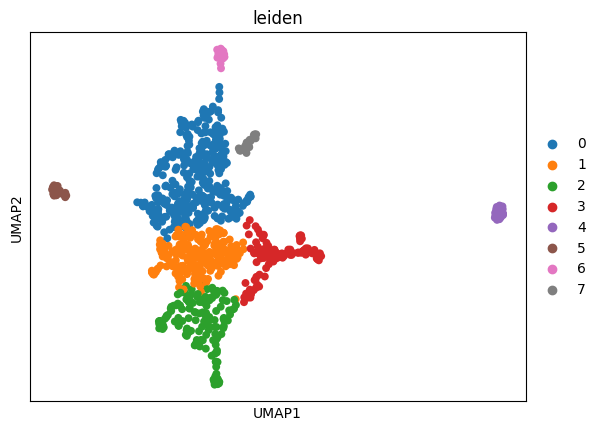

In [30]:
W1_norm = W1 / np.clip(W1.sum(axis=1, keepdims=True), a_min=1e-10, a_max=None)
adata1 = sc.AnnData(W1_norm)
sc.pp.neighbors(adata1, n_neighbors=30, metric='euclidean')
sc.tl.leiden(adata1, resolution=0.25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color='leiden')

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


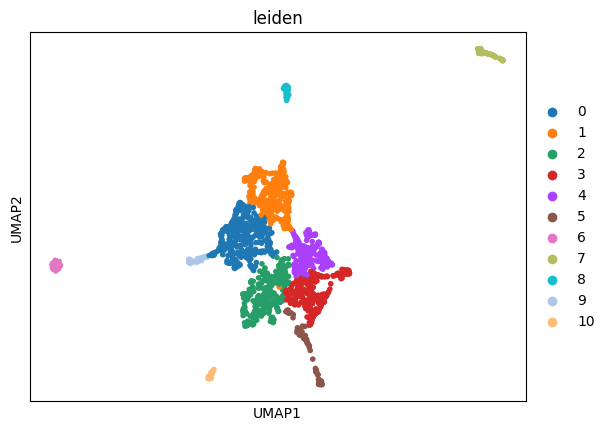

In [29]:
W2_norm = W2 / np.clip(W2.sum(axis=1, keepdims=True), a_min=1e-10, a_max=None)
adata2 = sc.AnnData(W2_norm)
sc.pp.neighbors(adata2, n_neighbors=30, metric='euclidean')
sc.tl.leiden(adata2, resolution=0.25)
sc.tl.umap(adata2)
sc.pl.umap(adata2, color='leiden')

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Trying n_neighbors = 5
Silhouette score for n_neighbors=5: 0.250
Trying n_neighbors = 10


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=10: 0.227
Trying n_neighbors = 15


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=15: 0.267
Trying n_neighbors = 20


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=20: 0.278
Trying n_neighbors = 30
Silhouette score for n_neighbors=30: 0.229

Silhouette scores for different n_neighbors:
n_neighbors = 5, silhouette score = 0.250
n_neighbors = 10, silhouette score = 0.227
n_neighbors = 15, silhouette score = 0.267
n_neighbors = 20, silhouette score = 0.278
n_neighbors = 30, silhouette score = 0.229

Best n_neighbors based on silhouette score: 20


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


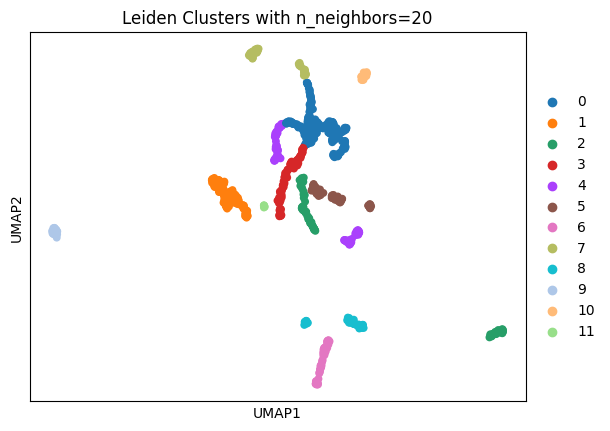

In [44]:
adata_region1.obsm['X_nmf'] = W1

# finding the best n_neighbors for leiden clustering
def compute_silhouette_scores(adata, n_neighbors_list=[5, 10, 15, 20, 30]):
    silhouette_scores = {}

    for n_neighbors in n_neighbors_list:
        print(f"Trying n_neighbors = {n_neighbors}")
        # calculate neighbors
        sc.pp.neighbors(adata, use_rep='X_nmf', n_neighbors=n_neighbors)

        # leiden clustering
        sc.tl.leiden(adata, resolution=0.5)
        
        # calculate silhouette score
        labels = adata.obs['leiden'].astype(int)
        silhouette_avg = silhouette_score(adata.obsm['X_nmf'], labels)

        silhouette_scores[n_neighbors] = silhouette_avg
        print(f"Silhouette score for n_neighbors={n_neighbors}: {silhouette_avg:.3f}")
    
    return silhouette_scores

sil_scores = compute_silhouette_scores(adata_region1, n_neighbors_list=[5, 10, 15, 20, 30])

print("\nSilhouette scores for different n_neighbors:")
for n, score in sil_scores.items():
    print(f"n_neighbors = {n}, silhouette score = {score:.3f}")

# find the best n_neighbors based on silhouette score
best_n_neighbors = max(sil_scores, key=sil_scores.get)
print(f"\nBest n_neighbors based on silhouette score: {best_n_neighbors}")

sc.pp.neighbors(adata_region1, use_rep='X_nmf', n_neighbors=best_n_neighbors)
sc.tl.leiden(adata_region1, resolution=0.1)

sc.tl.umap(adata_region1)
sc.pl.umap(adata_region1, color='leiden', title=f'Leiden Clusters with n_neighbors={best_n_neighbors}')

Trying n_neighbors = 5


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=5: -0.084
Trying n_neighbors = 10


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=10: -0.096
Trying n_neighbors = 15


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=15: -0.117
Trying n_neighbors = 20


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=20: -0.118
Trying n_neighbors = 30


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Silhouette score for n_neighbors=30: -0.148

Silhouette scores for different n_neighbors:
n_neighbors = 5, silhouette score = -0.084
n_neighbors = 10, silhouette score = -0.096
n_neighbors = 15, silhouette score = -0.117
n_neighbors = 20, silhouette score = -0.118
n_neighbors = 30, silhouette score = -0.148

Best n_neighbors based on silhouette score: 5


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


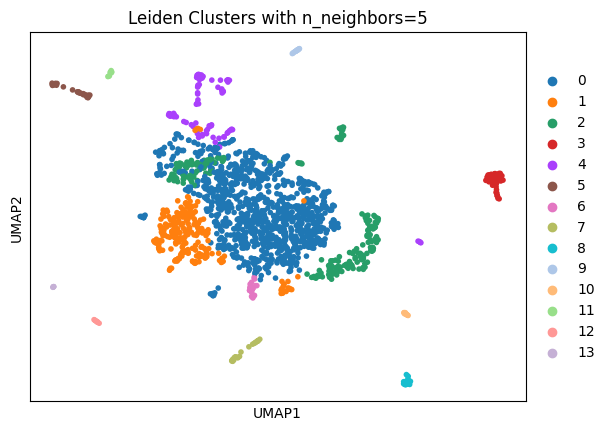

In [45]:
adata_region2.obsm['X_nmf'] = W2

# finding the best n_neighbors for leiden clustering
def compute_silhouette_scores(adata, n_neighbors_list=[5, 10, 15, 20, 30]):
    silhouette_scores = {}

    for n_neighbors in n_neighbors_list:
        print(f"Trying n_neighbors = {n_neighbors}")
        # calculate neighbors
        sc.pp.neighbors(adata, use_rep='X_nmf', n_neighbors=n_neighbors)

        # leiden clustering
        sc.tl.leiden(adata, resolution=0.5)
        
        # calculate silhouette score
        labels = adata.obs['leiden'].astype(int)
        silhouette_avg = silhouette_score(adata.obsm['X_nmf'], labels)

        silhouette_scores[n_neighbors] = silhouette_avg
        print(f"Silhouette score for n_neighbors={n_neighbors}: {silhouette_avg:.3f}")
    
    return silhouette_scores

sil_scores = compute_silhouette_scores(adata_region2, n_neighbors_list=[5, 10, 15, 20, 30])

print("\nSilhouette scores for different n_neighbors:")
for n, score in sil_scores.items():
    print(f"n_neighbors = {n}, silhouette score = {score:.3f}")

# find the best n_neighbors based on silhouette score
best_n_neighbors = max(sil_scores, key=sil_scores.get)
print(f"\nBest n_neighbors based on silhouette score: {best_n_neighbors}")

sc.pp.neighbors(adata_region2, use_rep='X_nmf', n_neighbors=best_n_neighbors)
sc.tl.leiden(adata_region2, resolution=0.1)

sc.tl.umap(adata_region2)
sc.pl.umap(adata_region2, color='leiden', title=f'Leiden Clusters with n_neighbors={best_n_neighbors}')

In [36]:
clusters1 = adata1.obs['leiden']
clusters2 = adata2.obs['leiden']

# convert W1 to a DataFrame for easier manipulation
df_W1 = pd.DataFrame(W1_norm, index=adata1.obs_names,
                    columns=[f"Component_{i+1}" for i in range(W1_norm.shape[1])])
df_W2 = pd.DataFrame(W2_norm, index=adata2.obs_names,
                    columns=[f"Component_{i+1}" for i in range(W2_norm.shape[1])])
df_W1["cluster"] = clusters1.values
df_W2["cluster"] = clusters2.values

# calculate the average activation of each NMF component for each cluster
cluster_means1 = df_W1.groupby("cluster").mean()
cluster_means2 = df_W2.groupby("cluster").mean()

/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T/ipykernel_21933/3855573469.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means1 = df_W1.groupby("cluster").mean()
/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T/ipykernel_21933/3855573469.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means2 = df_W2.groupby("cluster").mean()


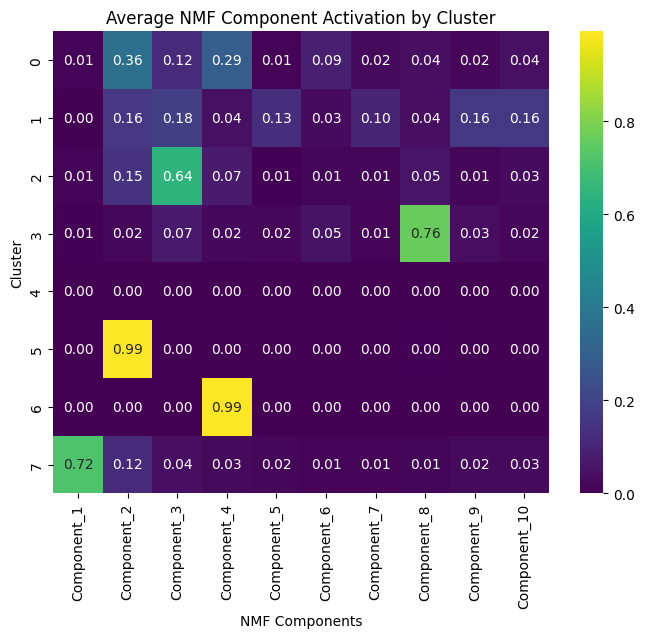

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means1, cmap="viridis", annot=True, fmt=".2f")
plt.title("Average NMF Component Activation by Cluster")
plt.xlabel("NMF Components")
plt.ylabel("Cluster")
plt.show()

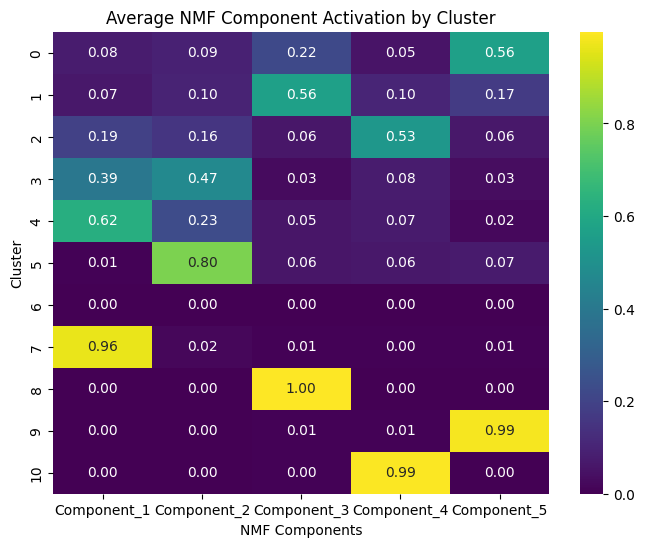

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means2, cmap="viridis", annot=True, fmt=".2f")
plt.title("Average NMF Component Activation by Cluster")
plt.xlabel("NMF Components")
plt.ylabel("Cluster")
plt.show()

In [32]:
cluster_means1

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10
cluster,,,,,,,,,,
0,8.468623e-03,0.363704,0.117404,0.292074,0.010550,0.088430,0.024244,0.037321,0.017861,3.994278e-02
1,3.474029e-03,0.157489,0.184081,0.040611,0.130274,0.029094,0.097085,0.036343,0.159864,1.616842e-01
2,8.595416e-03,0.146967,0.642469,0.072698,0.006912,0.013081,0.014756,0.051269,0.014626,2.862773e-02
3,5.627627e-03,0.017540,0.066251,0.021975,0.019081,0.048262,0.010443,0.760522,0.034062,1.623595e-02
4,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.731896e-83
5,1.617095e-05,0.989475,0.000748,0.000356,0.001316,0.000555,0.000697,0.004555,0.002282,0.000000e+00
6,1.784357e-07,0.000625,0.000247,0.993245,0.000965,0.000934,0.000920,0.000000,0.003063,0.000000e+00
7,7.154730e-01,0.118959,0.036796,0.025811,0.019234,0.009894,0.009484,0.013768,0.024442,2.613778e-02


In [33]:
cluster_means2

,Component_1,Component_2,Component_3,Component_4,Component_5
cluster,,,,,
0,0.075335,0.090122,0.220479,0.051856,0.562208
1,0.065195,0.096176,0.563320,0.102290,0.173019
2,0.194902,0.155925,0.058939,0.527590,0.062644
3,0.394494,0.468014,0.029340,0.076805,0.031347
4,0.624649,0.226468,0.054997,0.073254,0.020631
5,0.005878,0.802074,0.057519,0.062928,0.071601
6,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.964387,0.017811,0.005566,0.004712,0.007525
8,0.000012,0.000112,0.998192,0.001540,0.000145


In [35]:
def get_top_genes(H, gene_names, top_n=10):
    top_genes = {}
    for i, comp in enumerate(H):
        # getting the indices of the top genes
        top_idx = np.argsort(comp)[::-1][:top_n]
        top_genes[f"Component_{i+1}"] = [gene_names[j] for j in top_idx]
    return top_genes

# get gene names from the adata object
gene_names = adata_A1.var_names.tolist()
top_genes = get_top_genes(H1, gene_names, top_n=10)

print("top genes:")
for comp, genes in top_genes.items():
    print(f"{comp}: {genes}")

top genes:
Component_1: ['IGKC', 'MANF', 'SLC12A2', 'SEMG1', 'CPE', 'IGHA2', 'MYL9', 'MCAM', 'FHL2', 'SPATS1']
Component_2: ['COL3A1', 'COL5A2', 'PDGFRA', 'S100A4', 'CPE', 'PDPN', 'CREM', 'JUNB', 'CD81', 'MANF']
Component_3: ['CD74', 'ENPP2', 'MCAM', 'S100A4', 'KLF5', 'CD81', 'JUNB', 'PDGFRA', 'CD24', 'LRIG1']
Component_4: ['COL1A1', 'ACTA2', 'MYL9', 'CD55', 'NUCB2', 'EHD2', 'COL5A2', 'IGHM', 'CD52', 'AQP3']
Component_5: ['PECAM1', 'BACE2', 'ACTA2', 'CPE', 'NUCB2', 'CD34', 'VCAM1', 'ITGA1', 'CD55', 'MCAM']
Component_6: ['BGN', 'MYLK', 'CPE', 'S100A4', 'PDPN', 'ENPP2', 'SNCG', 'KDR', 'JUNB', 'SPCS3']
Component_7: ['VWF', 'S100A4', 'ACTA2', 'CPE', 'JUNB', 'BACE2', 'EHD2', 'MCAM', 'CDH5', 'CD55']
Component_8: ['SLC12A2', 'KRT7', 'PROM1', 'PDHA1', 'JUNB', 'EPCAM', 'ACTA2', 'MYLK', 'ELF3', 'EHF']
Component_9: ['ENG', 'ENPP2', 'CPE', 'BACE2', 'EHD2', 'FHL2', 'ITGA1', 'KDR', 'MANF', 'SNCG']
Component_10: ['CD34', 'EHD2', 'MYL9', 'FABP4', 'CDH5', 'MCAM', 'ACTA2', 'ENPP2', 'JUNB', 'TEK']


In [17]:
top_genes = get_top_genes(H1, gene_names, top_n=10)

go_results = {}

for comp, genes in top_genes.items():
    print(f"analyzing {comp} ...")
    enr = gp.enrich(
        gene_list=genes,
        gene_sets="../Data/c5.go.v2024.1.Hs.symbols.gmt",
        outdir=None,
        cutoff=0.5,
    )

    if not enr.results.empty:
        go_results[comp] = enr.results
        print(enr.results.head(3))
    else:
        print(f"{comp} no GO results found.")

analyzing Component_1 ...
                       Gene_set                                Term Overlap  \
0  c5.go.v2024.1.Hs.symbols.gmt    GOBP_ACIDIC_AMINO_ACID_TRANSPORT    1/67   
1  c5.go.v2024.1.Hs.symbols.gmt   GOBP_ACTIN_FILAMENT_BASED_PROCESS   1/834   
2  c5.go.v2024.1.Hs.symbols.gmt  GOBP_ACTIVATION_OF_IMMUNE_RESPONSE   2/583   

    P-value  Adjusted P-value  Odds Ratio  Combined Score       Genes  
0  0.033886          0.092425   46.056589      155.889558     SLC12A2  
1  0.354565          0.385546    3.529284        3.659386        MYL9  
2  0.034338          0.092425    9.550604       32.199977  IGKC;IGHA2  
analyzing Component_2 ...
                       Gene_set  \
0  c5.go.v2024.1.Hs.symbols.gmt   
1  c5.go.v2024.1.Hs.symbols.gmt   
2  c5.go.v2024.1.Hs.symbols.gmt   

                                                Term Overlap   P-value  \
0                  GOBP_ACTIN_FILAMENT_BASED_PROCESS   2/834  0.065626   
1             GOBP_ACTOMYOSIN_STRUCTURE_ORGANIZATION  

In [18]:
go_results['Component_1']

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ACIDIC_AMINO_ACID_TRANSPORT,1/67,0.033886,0.092425,46.056589,155.889558,SLC12A2
1,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ACTIN_FILAMENT_BASED_PROCESS,1/834,0.354565,0.385546,3.529284,3.659386,MYL9
2,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ACTIVATION_OF_IMMUNE_RESPONSE,2/583,0.034338,0.092425,9.550604,32.199977,IGKC;IGHA2
3,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ACTOMYOSIN_STRUCTURE_ORGANIZATION,1/216,0.105570,0.164182,14.103187,31.709352,MYL9
4,c5.go.v2024.1.Hs.symbols.gmt,GOBP_ADAPTIVE_IMMUNE_RESPONSE,2/756,0.055085,0.113552,7.293299,21.142417,IGKC;IGHA2
...,...,...,...,...,...,...,...,...
667,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TRANSMEMBRANE_RECEPTOR_PROTEIN_SERINE_THR...,1/19,0.009717,0.057277,165.964438,769.065743,ENG
668,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TRANSPORTER_ACTIVITY,1/1240,0.482173,0.500621,2.321543,1.693453,SLC12A2
669,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TYPE_II_TRANSFORMING_GROWTH_FACTOR_BETA_R...,1/11,0.005636,0.052633,292.533835,1514.919997,ENG
670,c5.go.v2024.1.Hs.symbols.gmt,GOMF_TYPE_I_TRANSFORMING_GROWTH_FACTOR_BETA_RE...,1/11,0.005636,0.052633,292.533835,1514.919997,ENG


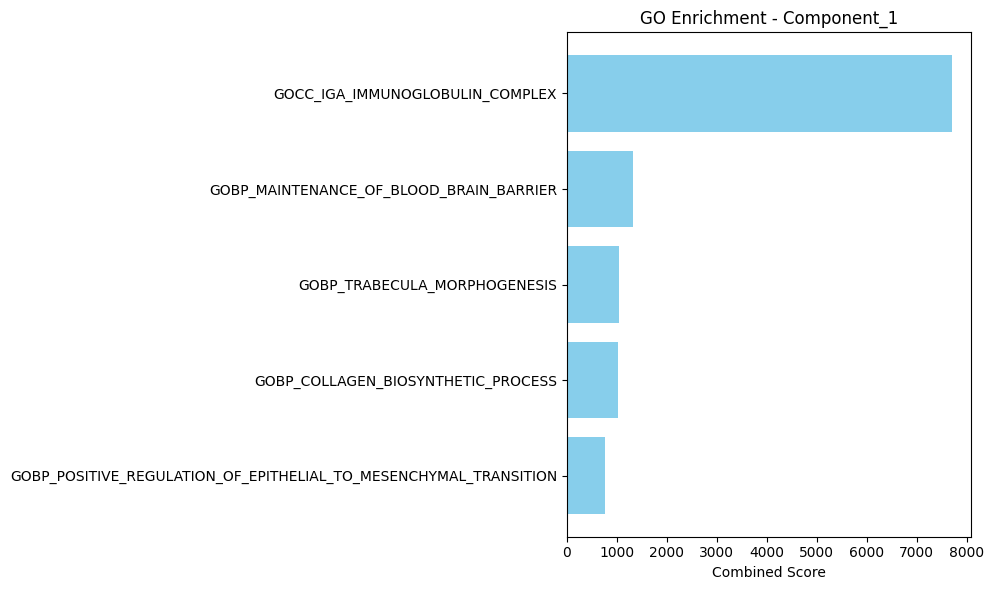

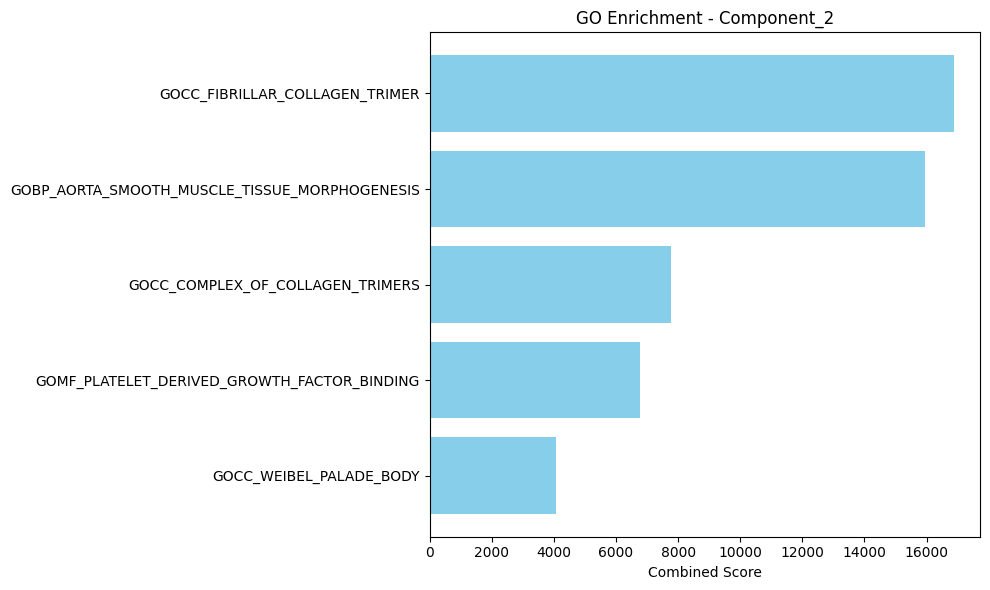

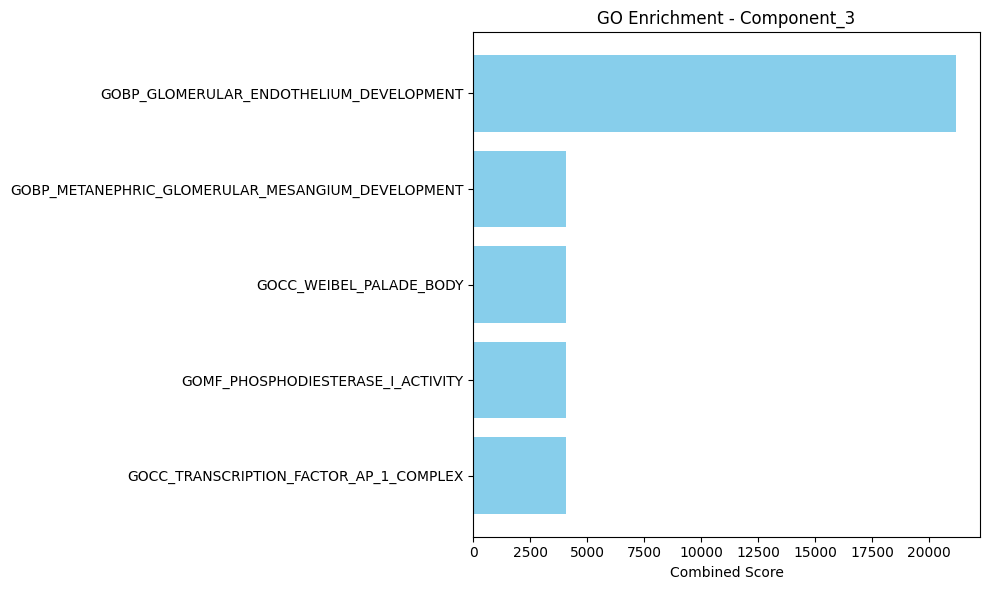

In [19]:
def plot_go_enrichment(go_results, top_n=5):
    for comp, df in go_results.items():
        # filter by Adjusted P-value(P-value < 0.05)
        sig = df[df['Adjusted P-value'] < 0.05]
        
        if sig.empty:
            print(f"{comp} no significant GO terms, skipping plot")
            continue

        # sorted and top 10 GO term
        sig = sig.sort_values('Combined Score', ascending=False).head(top_n)

        plt.figure(figsize=(10, 6))
        plt.barh(sig['Term'], sig['Combined Score'], color='skyblue')
        plt.xlabel('Combined Score')
        plt.title(f'GO Enrichment - {comp}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

plot_go_enrichment(go_results, top_n=5)
